# Machine learning Models

Finaly we will test diferent machine learning models to see wich one best fit our data.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
#from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from math import sqrt
from numpy import random
from scipy import stats as stats
import xgboost as xgb

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Importing Data

Let's import the data our X_train, X_test, y_train and y_test that we produce in the last notebook.

In [2]:
X_train= pd.read_csv('X_train.csv')
X_test= pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test= pd.read_csv('y_test.csv')

## Linear Regression

Here we use cross_val_score to estimate the error in the linear regression model. Than we calculate the mean of this error.

In [3]:
LR=LinearRegression()

# let's train using cross validation

val_rmse_LR = -1*cross_val_score(estimator = LR, X=X_train, y=y_train, cv=10, scoring='neg_root_mean_squared_error')

mean_val_rmse_LR = val_rmse_LR.mean()
mean_val_rmse_LR

67.66697023937469

## Decision Tree Regressor

Here we use cross_val_score to estimate the error in the decision tree regressor model. Than we calculate the mean of this error.

In [4]:
DTR= DecisionTreeRegressor()

val_rmse_DTR = -1*cross_val_score(estimator = DTR, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=10, 
                                  scoring='neg_root_mean_squared_error')

mean_val_rmse_DTR= val_rmse_DTR.mean()
mean_val_rmse_DTR

83.53493699003391

## Random Forest Regressor

Here we use cross_val_score to estimate the error in the random forest regressor model. Than we calculate the mean of this error.

In [5]:
RFR= RandomForestRegressor()


val_rmse_RFR=-1*cross_val_score(estimator = RFR,
                                X=X_train,
                                y=y_train.values.flatten(),
                                cv=10,
                                scoring='neg_root_mean_squared_error')

mean_val_rmse_RFR = val_rmse_RFR.mean()
mean_val_rmse_RFR

71.29670172671523

## XGBoost

Here we use cross_val_score to estimate the error in the XGBoost regressor model. Than we calculate the mean of this error.

In [6]:
XGB =xgb.XGBRegressor(random_state=42, n_estimators=100, min_child_weight = 1
                     )

val_rmse_XGB = -1*cross_val_score(estimator=XGB,
                              X= X_train,
                              y=y_train.values.flatten(),
                              cv=10,
                              scoring = 'neg_root_mean_squared_error')

mean_val_rmse_XGB = val_rmse_XGB.mean()
mean_val_rmse_XGB

66.11957854052133

# Comparing The models

Let's see the dispersion by analising the boxplot of the mean squared error for all of our models. The boxplot shows that The error of the linear regression is smoller than the error of decision tree regressor. So this is the model we will use in our test dataset.

[Text(0, 0, 'Linear_Regression'),
 Text(1, 0, 'Decision_Tree_Regressor'),
 Text(2, 0, 'Random_Forest_Regressor'),
 Text(3, 0, 'XGBoost')]

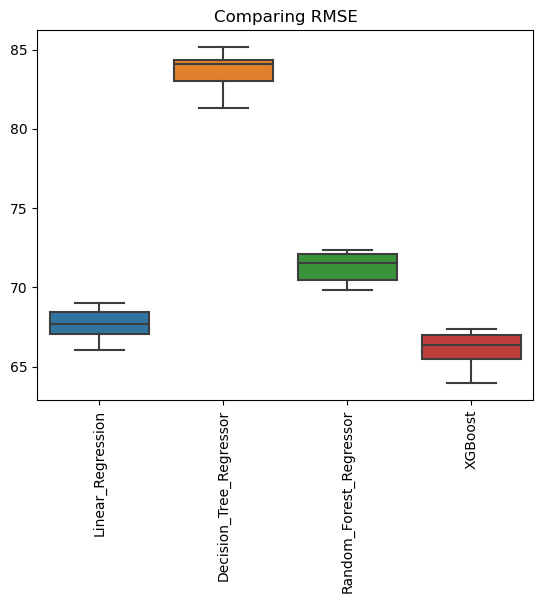

In [7]:
rmse = pd.DataFrame({'Linear_Regression': val_rmse_LR, 'Decision_Tree_Regressor': val_rmse_DTR, 'Random_Forest_Regressor':val_rmse_RFR, 
                     'XGBoost': val_rmse_XGB} )
box=sns.boxplot(data=rmse)
box.set_title('Comparing RMSE')
box.set_xticklabels(box.get_xticklabels(), rotation=90)

# champion model

We fit all the train data to our XGBoost model

In [8]:
XGB.fit(X_train, y_train)
#LR.coef_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Let's predict our final grade in the test dataset

In [9]:
grades_predicted = XGB.predict(X_test)
print('Square Root of Mean Squared Error (MSE):', mean_squared_error(y_test, grades_predicted)**0.5)

Square Root of Mean Squared Error (MSE): 65.69045302262282


We use r2_score to estimate how much of the behaviour of our data is explained by our champion model.

In [12]:
r2=r2_score(y_true=y_test, y_pred = grades_predicted)
print('r2_score:', r2)

r2_score: 0.40064289814854104
